<table style="width:100%; text-align:center; border-collapse:collapse;">
  <tr>
    <th style="text-align:center;" colspan="2">Algorithm's Project</th>
  </tr>
  <tr>
    <td style="text-align:center;" colspan="2">Skyline Problem: Calculating Building Outlines Using Divide-and-Conquer</td>
  </tr>
  <tr>
    <th style="text-align:center;" colspan="2">Student Name</th>
  </tr>
  <tr>
    <td style="text-align:center; padding:10px;" colspan="2">Muneerah AlDhafian</td>
  </tr>
  <tr>
    <td style="text-align:center; padding:10px;" colspan="2">Reem Alshehri</td>
  </tr>
</table>


Input Points = [(1, 11, 5), (3, 8, 10), (7, 15, 20), (15, 20, 22)] 
 
Formatted Output = [1, 11, 4, 8, 2, 15, 8, 20, 7, 0] 
 



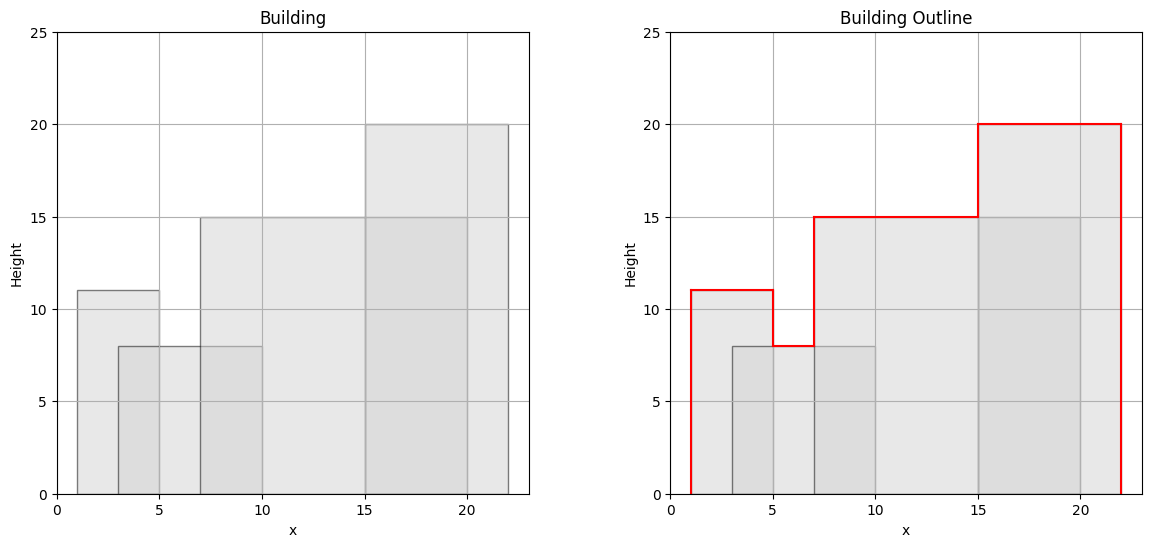

In [ ]:
def calculateSkyline(buildings):
    n = len(buildings)
    if n == 0:  # If no buildings, return empty list
        return []
    elif n == 1:  # Base case: single building
        L, H, R = buildings[0]
        return [(L, H), (R, 0)]  # Start and end of the single building
    else:

        mid = n // 2 # Split the buildings into left and right halves
        left_half = buildings[:mid]
        right_half = buildings[mid:]
        left_skyline = calculateSkyline(left_half)
        right_skyline = calculateSkyline(right_half)
        # Merge the two skylines
        return mergeSkylineParts(left_skyline, right_skyline)

def mergeSkylineParts(left, right):
    h1 = 0
    h2 = 0
    i = 0
    j = 0
    merged_skyline = []  # Final merged skyline

    # Merge until one of the skylines is exhausted
    while i < len(left) and j < len(right):
        if left[i][0] < right[j][0]:  # Left x-coordinate is smaller
            x, h1 = left[i]
            i += 1
        elif left[i][0] > right[j][0]:  # Right x-coordinate is smaller
            x, h2 = right[j]
            j += 1
        else:  # Same x-coordinate in both skylines
            x = left[i][0]
            h1 = left[i][1]
            h2 = right[j][1]
            i += 1
            j += 1

        # Calculate the maximum height at the current x-coordinate
        max_height = max(h1, h2)

        # If height changes from the previous point, add the new point
        if not merged_skyline or merged_skyline[-1][1] != max_height:
            merged_skyline.append((x, max_height))

    # Add remaining points from left or right skyline
    merged_skyline.extend(left[i:])
    merged_skyline.extend(right[j:])
    return merged_skyline

def formatSkylineCoordinates(skyline):
    formatted_output = []
    if skyline:
        x_previous, h_previous = skyline[0]
        formatted_output.extend([x_previous, h_previous])  # Start with the first point
        for i in range(1, len(skyline)):
            x_current, h_current = skyline[i]
            delta_x = x_current - x_previous  # Calculate the delta x
            formatted_output.extend([delta_x, h_current])  # Append delta x and new height
            x_previous = x_current  # Update x_previous
    return formatted_output

import matplotlib.pyplot as plt

def plotBuildings(ax, buildings):
    # Plot buildings in the first subplot
    ax.set_title('Building')
    for L, H, R in buildings:
        ax.add_patch(plt.Rectangle((L, 0), R-L, H, edgecolor='black', facecolor='lightgray', alpha=0.5))
    ax.set_xlim(0, max(R for _, _, R in buildings) + 1)
    ax.set_ylim(0, max(H for _, H, _ in buildings) + 5)
    ax.set_xlabel('x')
    ax.set_ylabel('Height')
    ax.grid(True)

def plotBuildingsAndSkyline(ax, buildings, outline):
    # Plot buildings in the second subplot
    ax.set_title('Building Outline')
    for L, H, R in buildings:
        ax.add_patch(plt.Rectangle((L, 0), R-L, H, edgecolor='black', facecolor='lightgray', alpha=0.5))

    # Plot skyline (outline)
    for i in range(len(outline) - 1):
        x1, h1 = outline[i]
        x2, h2 = outline[i + 1]
        ax.plot([x1, x2], [h1, h1], color='red')
        ax.plot([x2, x2], [h1, h2], color='red')

    ax.set_xlim(0, max(R for _, _, R in buildings) + 1)
    ax.set_ylim(0, max(H for _, H, _ in buildings) + 5)
    ax.set_xlabel('x')
    ax.set_ylabel('Height')
    ax.grid(True)

def plotAll(buildings, outline):
    # Create a single figure with two subplots (side by side)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns (larger figure size)

    # Plot the two subplots
    plotBuildings(ax[0], buildings)
    plotBuildingsAndSkyline(ax[1], buildings, outline)

    # Adjust the layout to add space between subplots
    plt.subplots_adjust(wspace=0.3)  # Adjust the space between the subplots (increase value for more space)

    plt.show()


#-------------------------------------------

# Input buildings in (L, H, R) format


buildings = [ #(L, H, R)
     (1, 11, 5),
     (3, 8, 10),
    (7, 15, 20),
   (15, 20, 22)
 ]

# Sort buildings by left x-coordinate
sorted_buildings = []
for building in buildings:
    inserted = False
    for i in range(len(sorted_buildings)):
        if building[0] < sorted_buildings[i][0]:  # Compare left x-coordinates
            sorted_buildings.insert(i, building)  # Insert in the correct position
            inserted = True
            break
    if not inserted:  # If not inserted, append to the end
        sorted_buildings.append(building)


# Replace the original list with the sorted one
buildings = sorted_buildings


# Calculate the skyline
skyline = calculateSkyline(buildings)

# Format the skyline coordinates for output
formatted_output = formatSkylineCoordinates(skyline)




print(f"Input Points = { buildings } \n " )
# Print the formatted output

print( f"Formatted Output = {formatted_output} \n ")

# print(type(formatted_output))

# plotBuildings(buildings)
outline2 = []
outline2.append((skyline[0][0],0))
for item in skyline:
    outline2.append(item)
print()
plotAll(buildings, outline2)
